In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
matplotlib.rc('font', family='Arial')

In [45]:
def plot(data, sortkey=None, legendtitle=None, titleextra=''):
    """expect data to be label -> loaded results.txt"""
    plt.figure(figsize=(5,5))
    for label in sorted(data, key=sortkey):
        if len(data[label].shape) > 1:
            plt.plot(np.arange(data[label].shape[0]), data[label][:, 1], label=label)
        else:
            print('problem with {}'.format(label))
    #plt.legend(loc='right', title=legendtitle)
    plt.xlabel('Epoch')
    plt.ylabel('Validation accuracy')
    plt.title('Validation accuracy by epoch' + titleextra)
    plt.yticks(np.arange(11) * 0.1)

In [7]:
def load_file(path):
    """load a results.txt"""
    with open(path) as fp:
        data = [line.split(',') for line in fp]
        data = [[float(val) for val in line] for line in data]
    if data[-1][1] == 0.0:
        data = data[:-1]
    return np.array(data)

In [8]:
data = {
    'lstm': load_file('../mnist_results/prelims/lstm-10/results.txt'),
    'vanilla': load_file('../mnist_results/prelims/vanilla-10/results.txt'),
    'irnn': load_file('../mnist_results/prelims/irnn-10/results.txt'),
    'gmrnn': load_file('../mnist_results/additive/baselinevanillaspec0999lr01/results.txt'),
    'cp+ 10': load_file('../mnist_results/additive/spec0999relu10_bigdecay/results.txt')
}

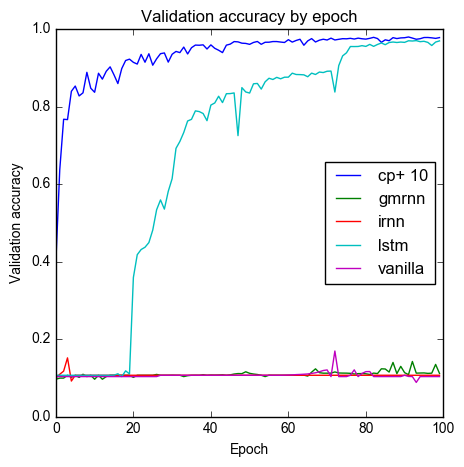

In [9]:
plot(data)

In [10]:
data = {
    '1': load_file('../mnist_results/additive/spec0999relu1_bigdecay/results.txt'),
    '10': load_file('../mnist_results/additive/spec0999relu10_bigdecay/results.txt'),
    '25': load_file('../mnist_results/additive/spec0999relu25_bigdecay/results.txt'),
    '50': load_file('../mnist_results/additive/spec0999relu50_bigdecay/results.txt'),
    '100': load_file('../mnist_results/additive/spec0999relu100_bigdecay/results.txt'),
    '150': load_file('../mnist_results/additive/spec0999relu150_bigdecay/results.txt')   
}

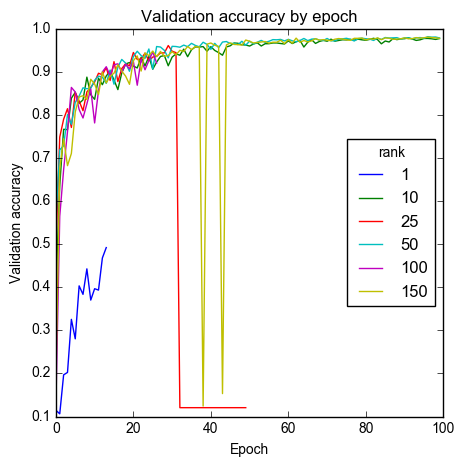

In [11]:
plot(data, sortkey=int, legendtitle='rank')

In [12]:
data = {
    '5': load_file('../mnist_results/grid_runs_permute/2/output/results.txt'),
    '25': load_file('../mnist_results/grid_runs_permute/3/output/results.txt'),
    '50': load_file('../mnist_results/grid_runs_permute/4/output/results.txt'),
    '75': load_file('../mnist_results/grid_runs_permute/5/output/results.txt'),
    '100': load_file('../mnist_results/grid_runs_permute/6/output/results.txt')
}

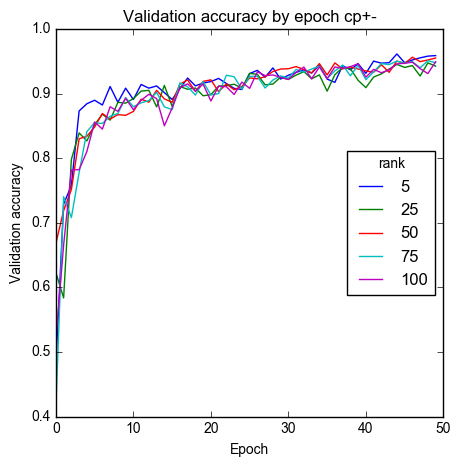

In [13]:
plot(data, sortkey=int, legendtitle='rank', titleextra=' cp+-')

In [14]:
data = {
    '5': load_file('../mnist_results/grid_runs_permute/grad1_8/output/results.txt'),
    '25': load_file('../mnist_results/grid_runs_permute/grad1_9/output/results.txt'),
    '50': load_file('../mnist_results/grid_runs_permute/grad1_10/output/results.txt'),
    '75': load_file('../mnist_results/grid_runs_permute/grad1_11/output/results.txt'),
    '100': load_file('../mnist_results/grid_runs_permute/grad1_12/output/results.txt')
}

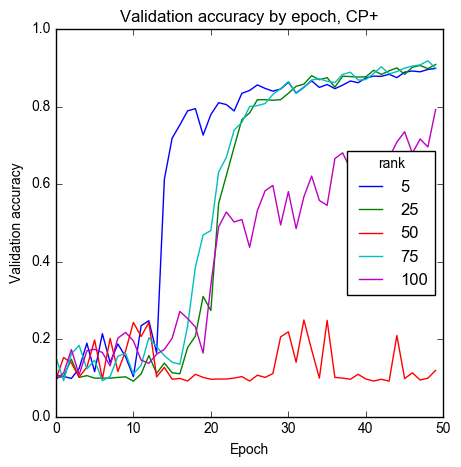

In [15]:
plot(data, sortkey=int, legendtitle='rank', titleextra=', CP+')

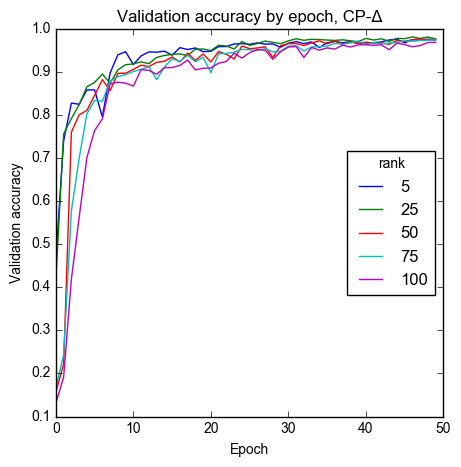

In [16]:
data = {
    '5': load_file('../mnist_results/grid_runs_permute/grad1_2/output/results.txt'),
    '25': load_file('../mnist_results/grid_runs_permute/grad1_3/output/results.txt'),
    '50': load_file('../mnist_results/grid_runs_permute/grad1_4/output/results.txt'),
    '75': load_file('../mnist_results/grid_runs_permute/grad1_5/output/results.txt'),
    '100': load_file('../mnist_results/grid_runs_permute/grad1_6/output/results.txt')
}
plot(data, sortkey=int, legendtitle='rank', titleextra=', CP-Δ')

problem with 5


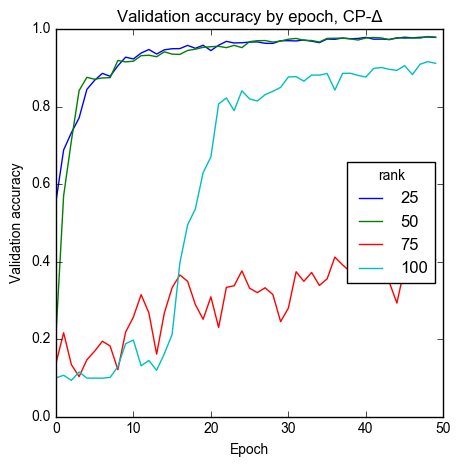

In [17]:
data = {
    '5': load_file('../mnist_results/grid_runs_permute/lowlr_1/output/results.txt'),
    '25': load_file('../mnist_results/grid_runs_permute/lowlr_2/output/results.txt'),
    '50': load_file('../mnist_results/grid_runs_permute/lowlr_3/output/results.txt'),
    '75': load_file('../mnist_results/grid_runs_permute/lowlr_4/output/results.txt'),
    '100': load_file('../mnist_results/grid_runs_permute/lowlr_6/output/results.txt')
}
plot(data, sortkey=int, legendtitle='rank', titleextra=', CP-Δ')

In [18]:
data = {
    'LSTM': load_file('../mnist_results/perms/lstm-150/results.txt'),
    'IRNN': load_file('../mnist_results/perms/irnn-150/results.txt'),
    'vanilla': load_file('../mnist_results/perms/vanilla-150/results.txt'),
    'CP-Δ': load_file('../mnist_results/grid_runs_permute/lowlr_3/output/results.txt'),
    'CP+': load_file('../mnist_results/grid_runs_permute/lowlr_6/output/results.txt'),
}

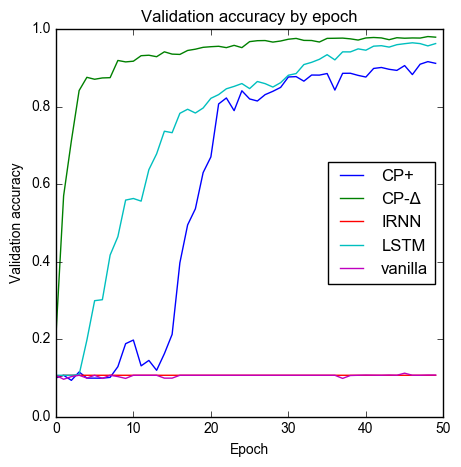

In [19]:
plot(data)

# I am convinced that the above are not actually on permuted

In [43]:
def load_gridruns(outer_dir):
    runs = os.listdir(outer_dir)
    print('Got {} runs'.format(len(runs)))
    
    data_dict = {}
    for run in runs:
        run_dir = os.path.join(outer_dir, run)
        details_file = os.path.join(run_dir, 'model_details.txt')
        if not os.path.exists(details_file):
            print('Run {} really failed'.format(run))
            continue
        with open(details_file) as fp:
            cell, rank, lr, gc = fp.read().strip().split(', ')
            rank = rank.split(' ')[-1]
            lr = lr.split(' ')[-1]
            gc = gc.split(' ')[-1]
        run_name = '{} ({}), {}, {}'.format(cell, rank, lr, gc)
        # now get the actual results
        results_file = os.path.join(run_dir, 'output', 'results.txt')
        if os.path.exists(results_file):
            valid_results = load_file(results_file)
            data_dict[run_name] = valid_results
        else:
            print('{} has no results'.format(run_name))
    return data_dict

Got 28 runs
cp+- (25), 0.01, 10.0 has no results
cp+- (25), 0.001, 1.0 has no results
cp+- (100), 0.001, 1.0 has no results
cp+ (1), 0.01, 10.0 has no results
problem with cp+- (1), 0.001, 10.0
problem with cp+- (1), 0.01, 1.0
problem with cp+- (1), 0.01, 10.0


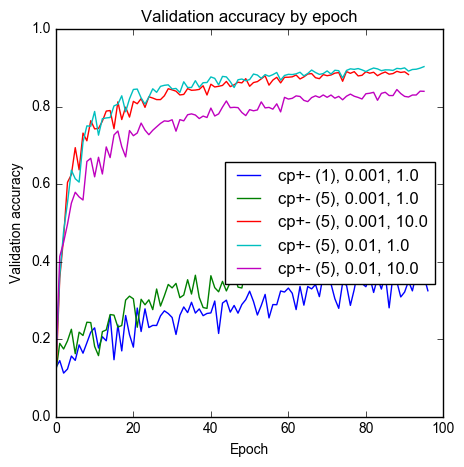

In [35]:
data_dict = load_gridruns('../mnist_results/grid_runs_permute_round2_adam/')
plot({key: data_dict[key] for key in data_dict if 'cp+-' in key})

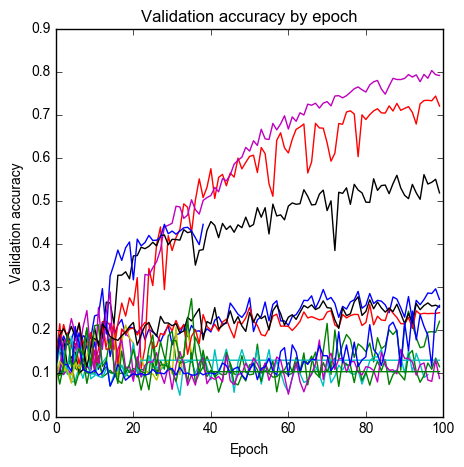

In [38]:
plot({key: data_dict[key] for key in data_dict if '-' not in key})

Got 44 runs
Run 45 really failed
Run 46 really failed
Run 47 really failed
Run 48 really failed
problem with cp+ (1), 0.01, 10.0
problem with cp+ (25), 0.01, 10.0
problem with cp+- (1), 0.001, 10.0
problem with cp+- (1), 0.01, 10.0


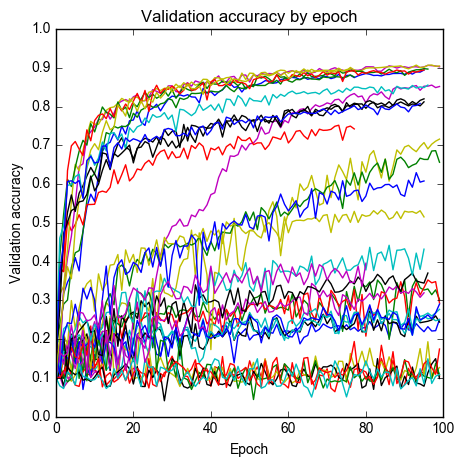

In [46]:
data_dict = load_gridruns('../mnist_results/grid_runs_permute_round2/')
plot(data_dict)

Got 43 runs
Run 43 really failed
Run 44 really failed
Run 45 really failed
Run 46 really failed
Run 47 really failed
Run 48 really failed
problem with cp-del (1), 0.01, 1000.0
problem with cp-del (1), 0.1, 1.0
problem with cp-del (1), 0.1, 10.0
problem with cp-del (1), 0.1, 1000.0
problem with cp-del (100), 0.1, 1000.0
problem with cp-del (101), 0.1, 1000.0
problem with cp-del (25), 0.1, 1000.0
problem with cp-del (5), 0.01, 1000.0
problem with cp-del (5), 0.1, 10.0
problem with cp-del (5), 0.1, 1000.0
problem with cp-del (50), 0.1, 1000.0


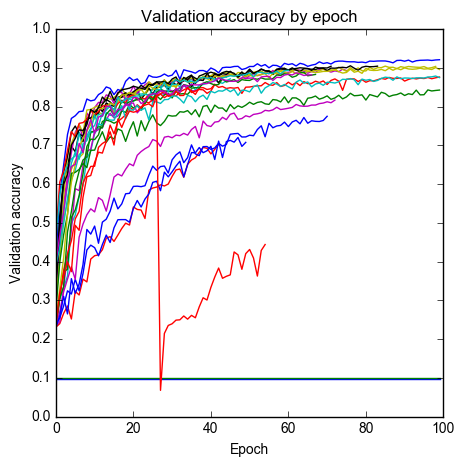

In [47]:
data_dict = load_gridruns('../mnist_results/grid_runs_permute_cp-del_partial/')
plot(data_dict)